#### Подгружаем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from tensorflow import keras 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 
from pandas import read_excel, DataFrame, Series
from pandas.plotting import scatter_matrix

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, mean_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

#### Загружаем исходные данные

In [2]:
df_bp = pd.read_excel('C:\\Users\\blago\\Documents\\VKR\\Data\\X_bp.xlsx', index_col=0)
df_nup = pd.read_excel('C:\\Users\\blago\\Documents\\VKR\\Data\\X_nup.xlsx', index_col=0)

In [3]:
df_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [4]:
df_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0


#### Объединим данные в один датасет 

In [5]:
# Поскольку оба наших DataFrames имеют столбец 0 c индексом,
# join() автоматически объединяет две таблицы, соответствующие этому ключу
# используем тип объединения Inner
df = df_bp.join(df_nup,  how='inner')

In [6]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


#### Отобразим описательные статистики и проведем разведочный анализ данных: для каждой колонки находим среденее, медиану, анализируем пропуски

In [7]:
#посмотрим, какая информация содержится в датасете, какие типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

In [8]:
# Отобразим описательные статистики нашего датасета
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


In [9]:
# Получаем медианные значения
df.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

In [10]:
# Подсчитаем количество пропусков в каждом столбце
df.isna().sum() 

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

##### Пропусков нет

#### Cтроим гистограмму распределения каждой переменной, диаграмму ящика с усами, попарные графики рассеивания точек, ищем выбросы и исключения

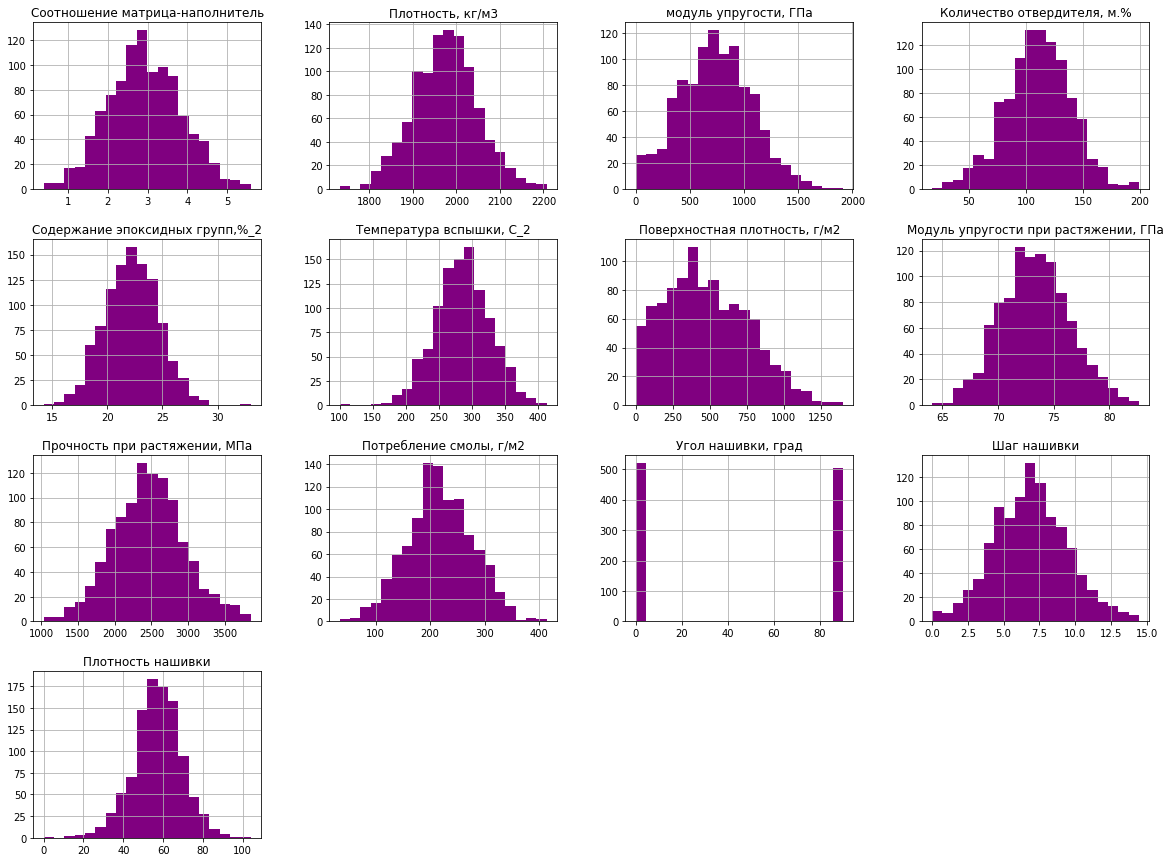

In [11]:
#строим гистограмму для переменных
df.hist(figsize=(20, 15), bins=20, color ="purple")
plt.show()

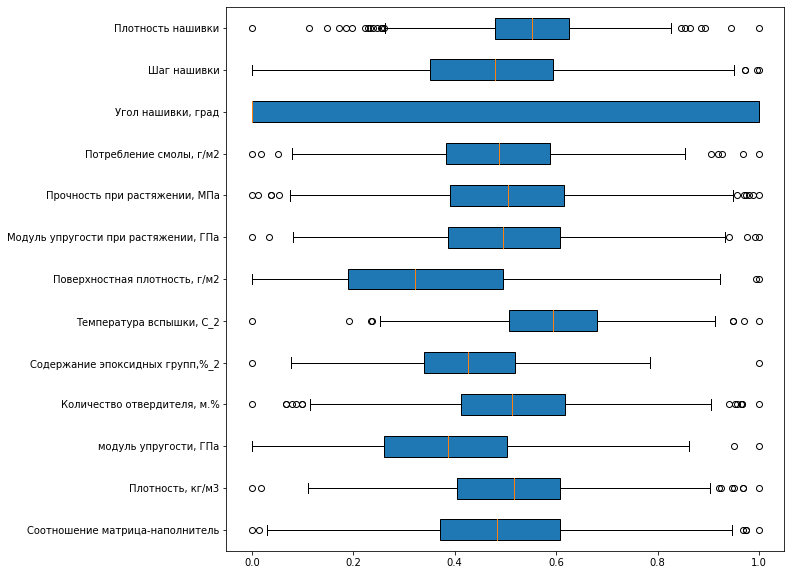

In [12]:
# строим диаграмму ящика с усами
scaler = MinMaxScaler()
scaler.fit(df)
plt.figure(figsize=(10, 10))
plt.boxplot(pd.DataFrame(scaler.transform(df)), labels = df.columns, patch_artist=True, meanline=True,vert=False)
plt.show()

##### По диаграммам "Ящик с усами" видим наличие выбросов по всем характеристикам, кроме угла нашивки

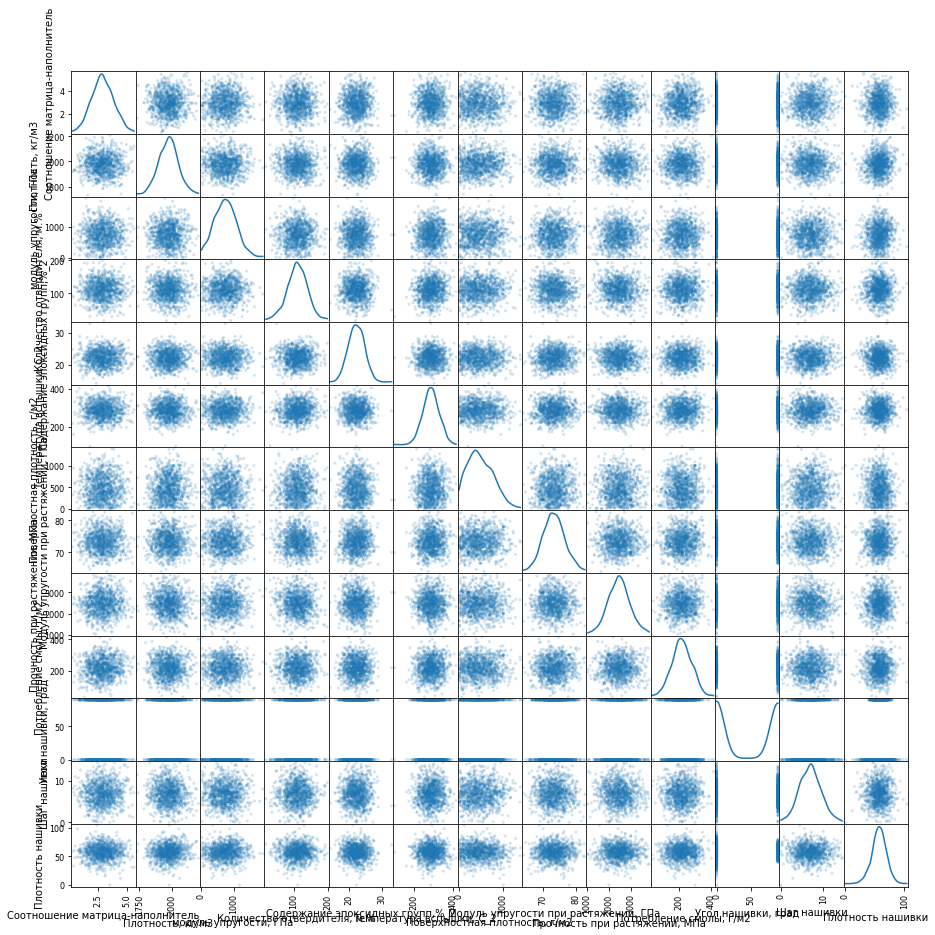

In [13]:
# Построим матрицу рассеяния
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde');

##### Из проведенного анализа данных видим, что значения колонки "Угол нашивки" принимает только 2 значения "0" и "90"

In [14]:
# Преобразуем занчения "Угол нашивки" с помощью LabelEncoder
le = preprocessing.LabelEncoder()
df['Угол нашивки, град'] = le.fit_transform(df['Угол нашивки, град'].values)
df['Угол нашивки, град']

0.0       0
1.0       0
2.0       0
3.0       0
4.0       0
         ..
1018.0    1
1019.0    1
1020.0    1
1021.0    1
1022.0    1
Name: Угол нашивки, град, Length: 1023, dtype: int64

In [15]:
# Матрица корреляции
df_corr= df.corr().round(3)
df_corr

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000,0.004,0.032,-0.006,0.020,-0.005,-0.006,-0.008,0.024,0.073,-0.031,0.036,-0.005
"Плотность, кг/м3",0.004,1.000,-0.010,-0.036,-0.008,-0.021,0.045,-0.018,-0.070,-0.016,-0.068,-0.061,0.080
"модуль упругости, ГПа",0.032,-0.010,1.000,0.024,-0.007,0.031,-0.005,0.023,0.042,0.002,-0.025,-0.010,0.056
"Количество отвердителя, м.%",-0.006,-0.036,0.024,1.000,-0.001,0.095,0.055,-0.066,-0.075,0.007,0.039,0.015,0.017
"Содержание эпоксидных групп,%_2",0.020,-0.008,-0.007,-0.001,1.000,-0.010,-0.013,0.057,-0.024,0.015,0.008,0.003,-0.039
"Температура вспышки, С_2",-0.005,-0.021,0.031,0.095,-0.010,1.000,0.020,0.028,-0.032,0.060,0.021,0.026,0.011
"Поверхностная плотность, г/м2",-0.006,0.045,-0.005,0.055,-0.013,0.020,1.000,0.037,-0.003,0.016,0.052,0.038,-0.050
"Модуль упругости при растяжении, ГПа",-0.008,-0.018,0.023,-0.066,0.057,0.028,0.037,1.000,-0.009,0.051,0.023,-0.029,0.006
"Прочность при растяжении, МПа",0.024,-0.070,0.042,-0.075,-0.024,-0.032,-0.003,-0.009,1.000,0.029,0.023,-0.060,0.020
"Потребление смолы, г/м2",0.073,-0.016,0.002,0.007,0.015,0.060,0.016,0.051,0.029,1.000,-0.015,0.013,0.012


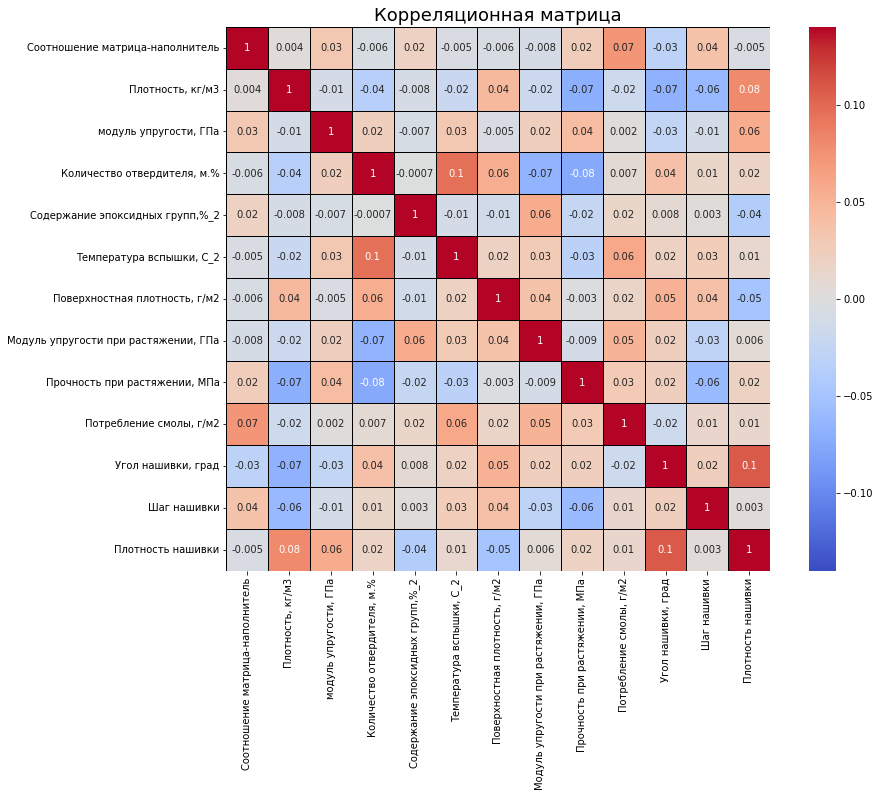

In [16]:
# тепловая карта корреляции
df_corr= df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(df_corr, cmap='coolwarm', vmin=-0.14, vmax=0.14, center= 0, square=True, annot=True, fmt='.1g', linewidths =0.5, linecolor= 'black')
plt.title("Корреляционная матрица", fontsize=18)
plt.show()

#### Обработаем выбросы

In [17]:
# Пробуем межквартильное расстояние. Вычислим межквартильный диапазон и заменим значения вне диапазона NaN
for x in df.columns:
    q75, q25 = np.percentile(df.loc[:,x],[75,25])
    qr = q75-q25


    max = q75+(1.5*qr)
    min = q25-(1.5*qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [18]:
# Cмотрим сколько выбросов получилось по каждому столбцу
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [19]:
# Удаляем выбросы
df = df.dropna(axis = 0)

# Проверяем удаление
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [20]:
# Получаем средние значения
df.mean()

Соотношение матрица-наполнитель            2.925683
Плотность, кг/м3                        1974.040023
модуль упругости, ГПа                    738.247627
Количество отвердителя, м.%              110.916216
Содержание эпоксидных групп,%_2           22.209030
Температура вспышки, С_2                 286.040414
Поверхностная плотность, г/м2            482.993901
Модуль упругости при растяжении, ГПа      73.305127
Прочность при растяжении, МПа           2467.488822
Потребление смолы, г/м2                  217.613374
Угол нашивки, град                         0.511752
Шаг нашивки                                6.915585
Плотность нашивки                         57.451895
dtype: float64

In [21]:
# Получаем медианные значения
df.median()

Соотношение матрица-наполнитель            2.904731
Плотность, кг/м3                        1977.258043
модуль упругости, ГПа                    738.736842
Количество отвердителя, м.%              111.113175
Содержание эпоксидных групп,%_2           22.184713
Температура вспышки, С_2                 286.024118
Поверхностная плотность, г/м2            457.732246
Модуль упругости при растяжении, ГПа      73.259230
Прочность при растяжении, МПа           2457.959767
Потребление смолы, г/м2                  218.388715
Угол нашивки, град                         1.000000
Шаг нашивки                                6.943337
Плотность нашивки                         57.584225
dtype: float64

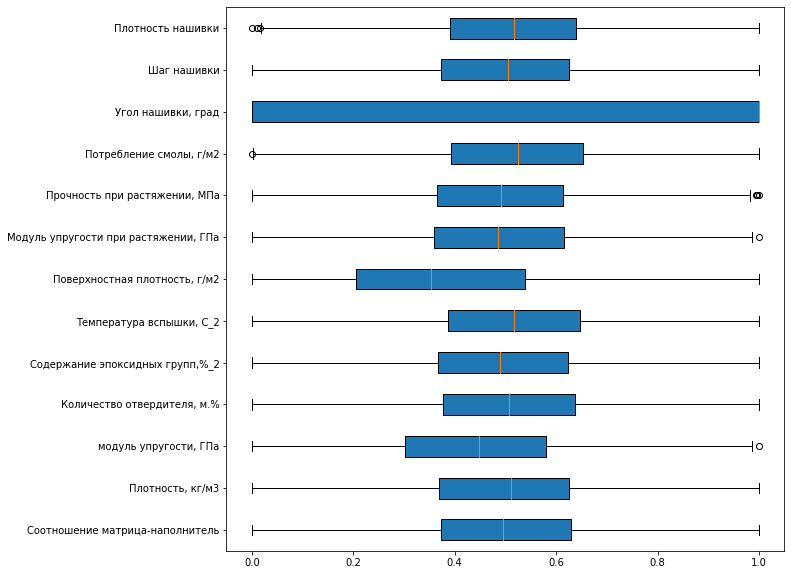

In [22]:
# строим диаграмму ящика с усами после удаления выбросов
scaler = MinMaxScaler()
scaler.fit(df)
plt.figure(figsize=(10, 10))
plt.boxplot(pd.DataFrame(scaler.transform(df)), labels = df.columns, patch_artist=True, meanline=True,vert=False)
plt.show()

In [23]:
# Отобразим описательные статистики нашего датасета после цдаления выбросов
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,936.0,2.925683,0.893712,0.547391,2.321931,2.904731,3.546650,5.314144
"Плотность, кг/м3",936.0,1974.040023,70.808120,1784.482245,1923.443748,1977.258043,2020.158764,2161.565216
"модуль упругости, ГПа",936.0,738.247627,328.708665,2.436909,498.577158,738.736842,958.418993,1649.415706
"Количество отвердителя, м.%",936.0,110.916216,27.037891,38.668500,92.523816,111.113175,130.001450,181.828448
"Содержание эпоксидных групп,%_2",936.0,22.209030,2.394871,15.695894,20.571516,22.184713,23.961818,28.955094
"Температура вспышки, С_2",936.0,286.040414,39.400677,179.374391,259.184486,286.024118,312.991425,386.067992
"Поверхностная плотность, г/м2",936.0,482.993901,280.190377,0.603740,266.004099,457.732246,695.900862,1291.340115
"Модуль упругости при растяжении, ГПа",936.0,73.305127,3.037381,65.553336,71.248823,73.259230,75.310788,81.417126
"Прочность при растяжении, МПа",936.0,2467.488822,463.838911,1250.392802,2146.936034,2457.959767,2755.169485,3705.672523
"Потребление смолы, г/м2",936.0,217.613374,57.827255,63.685698,179.489091,218.388715,256.396777,359.052220


##### Выполняем предобработку данных
##### Выполняем нормализацию

In [24]:
# Используем MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
df_norm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.289334,0.557156
1,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.335840
2,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.506083
3,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.557156
4,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.727399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.361662,0.444480,0.552781,0.337550,0.333908,0.703458,0.161609,0.475147,0.463043,0.207613,1.0,0.660014,0.336177
932,0.607674,0.704373,0.268550,0.749605,0.294428,0.362087,0.271207,0.464422,0.452087,0.182974,1.0,0.768759,0.450768
933,0.573391,0.498274,0.251612,0.501991,0.623085,0.334063,0.572959,0.578740,0.575296,0.585446,1.0,0.301102,0.687046
934,0.662497,0.748688,0.448724,0.717585,0.267818,0.466417,0.496511,0.535142,0.334513,0.451779,1.0,0.458245,0.527552


##### Выполняем стандартизацию

In [25]:
# Используем StandardScaler
df_standart = preprocessing.StandardScaler().fit(df_norm)
df_standart = df_standart.transform(df_norm)
df_standart = pd.DataFrame(df_standart, columns=df.columns)
df_standart

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.196260,0.790727,0.001489,-2.254199,0.643790,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-1.162360,0.226834
1,-1.196260,0.790727,0.001489,0.669189,-0.400666,0.354488,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.930436
2,-0.172802,0.790727,0.044904,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.040228
3,-0.176623,0.366820,0.029685,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,0.226834
4,-0.398622,-0.904900,0.209271,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,1.117043
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,-0.732548,-0.310188,0.531478,-0.885307,-0.871403,0.983609,-0.977698,-0.070548,-0.172989,-1.602276,0.976766,0.861447,-0.928676
932,0.580295,1.074592,-0.893411,1.297605,-1.090103,-0.808159,-0.472549,-0.126591,-0.231014,-1.728193,0.976766,1.455162,-0.329475
933,0.397344,-0.023557,-0.978322,-0.014163,0.730480,-0.955250,0.918256,0.470794,0.421529,0.328626,0.976766,-1.098113,0.906035
934,0.872860,1.310716,0.009825,1.127974,-1.237507,-0.260555,0.565897,0.242965,-0.853711,-0.354474,0.976766,-0.240153,0.072034


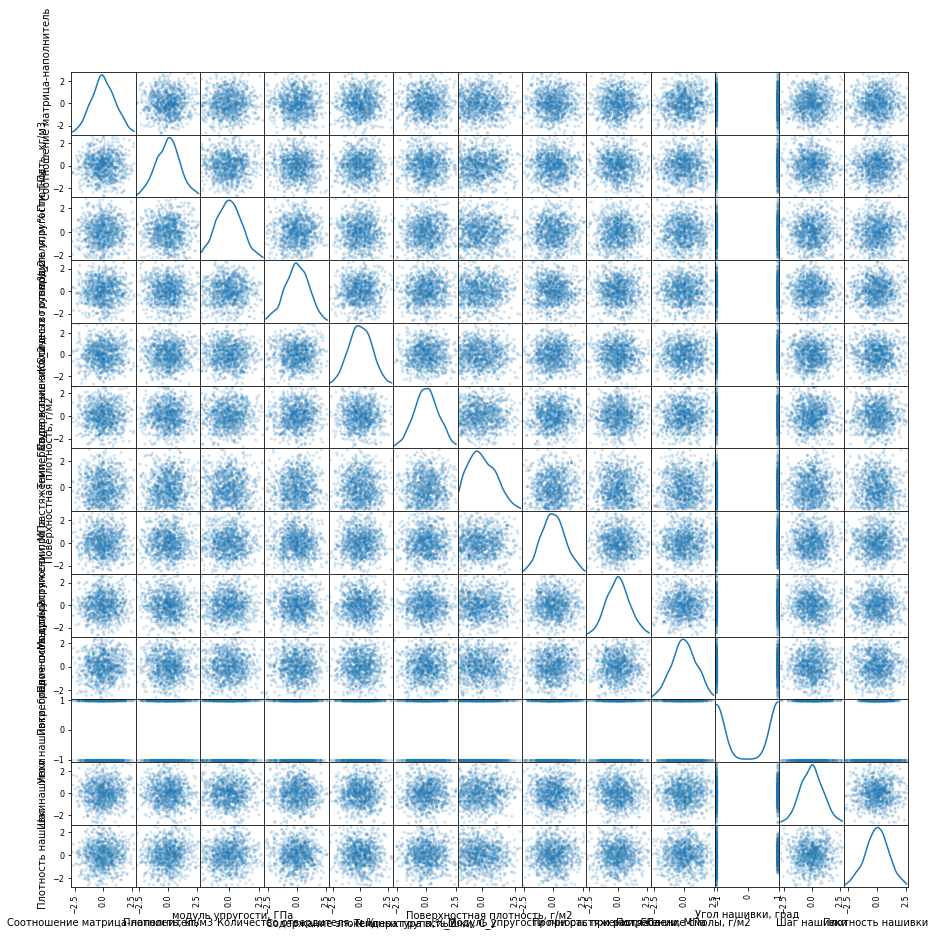

In [26]:
# Построим матрицу рассеяния после нормализации и стандартизации
scatter_matrix(df_standart, alpha=0.2, figsize=(15, 15), diagonal='kde');

##### Получили датасет, где после удаления выбросов осталось 936 строк и 13 стоблцов. Для исследования зависимостей Модуль упругости при растяжении и Прочность при растяжении от остальных данных создадим датасеты:

Удаляем столбецы "Модуль упругости при растяжении" и "Прочность при растяжении".
Назовем новый датасет "mu" и "pr". Запишем переменную "Модуль упругости при растяжении" в "mu_Y", а датасет "mu" с удаленными столбцами в "mu_X". Запишем переменную "Прочность при растяжении" в "pr_Y", а датасет "pr" с удаленными столбцами в "pr_X".

In [27]:
mu = df_standart.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'], axis = 1)
pr = df_standart.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'], axis = 1)
mu

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.196260,0.790727,0.001489,-2.254199,0.643790,-0.036187,-0.974837,0.041294,-1.023787,-1.162360,0.226834
1,-1.196260,0.790727,0.001489,0.669189,-0.400666,0.354488,-0.974837,0.041294,-1.023787,-0.763689,-0.930436
2,-0.172802,0.790727,0.044904,0.034925,0.024577,-0.036187,-0.974837,0.041294,-1.023787,-0.763689,-0.040228
3,-0.176623,0.366820,0.029685,0.034925,0.024577,-0.036187,-0.974837,0.041294,-1.023787,-0.763689,0.226834
4,-0.398622,-0.904900,0.209271,0.034925,0.024577,-0.036187,-0.974837,0.041294,-1.023787,-0.763689,1.117043
...,...,...,...,...,...,...,...,...,...,...,...
931,-0.732548,-0.310188,0.531478,-0.885307,-0.871403,0.983609,-0.977698,-1.602276,0.976766,0.861447,-0.928676
932,0.580295,1.074592,-0.893411,1.297605,-1.090103,-0.808159,-0.472549,-1.728193,0.976766,1.455162,-0.329475
933,0.397344,-0.023557,-0.978322,-0.014163,0.730480,-0.955250,0.918256,0.328626,0.976766,-1.098113,0.906035
934,0.872860,1.310716,0.009825,1.127974,-1.237507,-0.260555,0.565897,-0.354474,0.976766,-0.240153,0.072034


In [28]:
mu_X = mu
mu_Y = df_standart['Модуль упругости при растяжении, ГПа']
pr_X = pr
pr_Y = df_standart['Прочность при растяжении, МПа']

In [29]:
# Разобъем датасет mu_X и датасет pr_X на тестовую и тренировочную выборки.

# mu делим на тестовую и тренировочную выборки, зависимая  mu_Y - Модуль упругости при растяжении#
mu_X_train, mu_X_test, mu_Y_train,  mu_Y_test = train_test_split(mu_X, mu_Y, test_size = 0.30, random_state=1)

In [30]:
mu_X_train.shape

(655, 11)

In [31]:
mu_X_test.shape

(281, 11)

In [32]:
# pr делим на тестовую и тренировочную выборки, зависимая  pr_Y Прочность при растяжении
pr_X_train, pr_X_test, pr_Y_train,  pr_Y_test = train_test_split(pr_X, pr_Y, test_size = 0.30, random_state=1)

In [33]:
pr_X_train.shape

(655, 11)

In [34]:
pr_X_test.shape

(281, 11)

###### Пишем функцию, которая рассчитывает среденнее значение по тестовой выборке. Со средним будем сравнивать результаты предсказаний моделей

In [35]:
def mean_model(mu_Y_test):
    return [np.mean(mu_Y_test) for _ in range(len(mu_Y_test))]
mu_Y_pred_mean = mean_model(mu_Y_test)
mean_absolute_error (mu_Y_test, mu_Y_pred_mean)

0.8289382478364875

In [36]:
def mean_model(pr_Y_test):
    return [np.mean(pr_Y_test) for _ in range(len(pr_Y_test))]
pr_Y_pred_mean = mean_model(pr_Y_test)
mean_absolute_error (pr_Y_test, pr_Y_pred_mean)

0.7880988878953844

#### Линейная регрессия (Lenear Regression)

##### Для модуля упругости при растяжении

In [37]:
lin_reg= LinearRegression()
lin_reg.fit(mu_X_train, mu_Y_train)

LinearRegression()

In [38]:
# Score для тренировочной выборки 
print("Train score:", lin_reg.score(mu_X_train, mu_Y_train))

Train score: 0.021099855832543812


In [39]:
# Score для тестовой выборки 
print("Test score:", lin_reg.score(mu_X_test, mu_Y_test))

Test score: -0.019301402088411246


In [40]:
# Предсказание значения для mu
mu_Y_pred = lin_reg.predict(mu_X_test).round(3)
mu_lin = pd.DataFrame({'Actual': mu_Y_test, 'Predicted': mu_Y_pred})
mu_lin.head()

,Actual,Predicted
386,-1.384355,0.109
41,0.873654,-0.026
725,-0.528017,0.061
605,0.504928,0.130
35,-0.601519,-0.072


In [41]:
# Результаты модели
mu_mse_lin_elast = mean_squared_error(mu_Y_test, mu_Y_pred)
print("MAE: ", mean_absolute_error(mu_Y_test, mu_Y_pred))
print("MSE: ", mu_mse_lin_elast)
print("RMSE: ", np.sqrt(mu_mse_lin_elast))

MAE:  0.8385264893496368
MSE:  1.0347000196871035
RMSE:  1.0172020545039728


In [42]:
# Выводим результаты модели, которая всегда выдает среднее значение целевой переменной из тестовой выборки
# чем больше ошибка, тем занчит наша модель недалеко ушла от того, что она равна среднему....
mu_mse_lin_elast_mean = mean_squared_error(mu_Y_test, mu_Y_pred_mean)
print("MAE for mean target 'mu': ", mean_absolute_error(mu_Y_test, mu_Y_pred_mean))
print("MSE for mean target 'mu': ", mu_mse_lin_elast_mean)
print("RMSE for mean target 'mu': ", np.sqrt(mu_mse_lin_elast_mean))

MAE for mean target 'mu':  0.8289382478364875
MSE for mean target 'mu':  1.0151288241754837
RMSE for mean target 'mu':  1.0075360163167784


Text(0.5, 1.0, 'Linear Regression: y = Модуль упругости при растяжении')

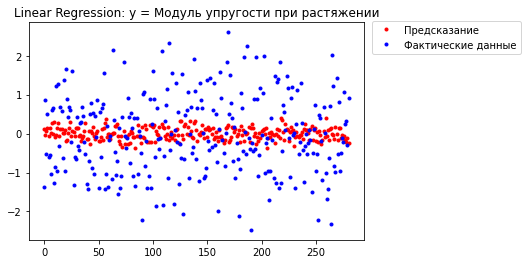

In [43]:
# mu-target
# модель плохо предсказывает

plt.plot(mu_Y_pred, 'r.')
plt.plot(mu_Y_test.reset_index(drop=True),'b.')

plt.legend(['Предсказание', 'Фактические данные'],bbox_to_anchor=(1.01,1.03))
plt.title('Linear Regression: y = Модуль упругости при растяжении')

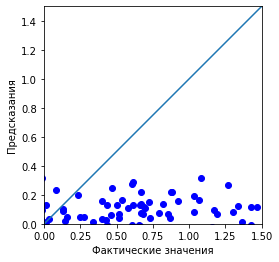

In [44]:
# Покажем, как предсказанные 
# значения совпадают с фактическими (mu-target)

tmu = plt.axes(aspect='equal')
plt.scatter(mu_Y_test, mu_Y_pred, c= 'b')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказания')
lims = [0, 1.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

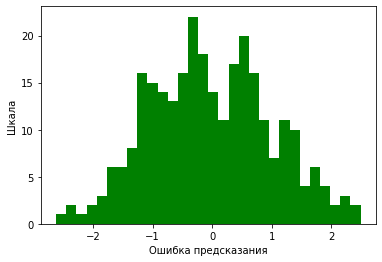

In [45]:
# Выведем график распределения ошибки (mu-target)
mu_error = mu_Y_test - mu_Y_pred
plt.hist(mu_error, bins=30, color = 'g')
plt.xlabel('Ошибка предсказания')
_ = plt.ylabel('Шкала')

In [46]:
lin = LinearRegression()
lin_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lin_mu = GridSearchCV(lin, lin_params, n_jobs=-1, cv=10)
GSCV_lin_mu.fit(mu_X_train, mu_Y_train)
GSCV_lin_mu.best_params_

{'fit_intercept': 'True'}

In [47]:
lin_mu = GSCV_lin_mu.best_estimator_
print(f'R2-score линейной регресии модуль упругости при растяжении: {lin_mu.score(mu_X_test, mu_Y_test).round(3)}')

R2-score линейной регресии модуль упругости при растяжении: -0.019


In [48]:
lin_mu_result = pd.DataFrame({
   'Model': 'LinearRegression_mu', 
   'MAE': mean_absolute_error(mu_Y_test, lin_mu.predict(mu_X_test)), 
   'R2 score': lin_mu.score(mu_X_test, mu_Y_test).round(3)
}, index=['Модуль упругости при растяжении'])

In [49]:
models = pd.DataFrame()

In [50]:
models1 = models.append(lin_mu_result)
models1

,Model,MAE,R2 score
Модуль упругости при растяжении,LinearRegression_mu,0.83853,-0.019


##### Вывод: линейная регрессия плохо предсказывает Модуль упругости при растяжении. Если бы sqrt стремился к нулю, то тогда хорошо бы предсказывала. Разброс ошибки также говорит, что должна быть использована другая модель.

##### Для прочности при растяжении

In [51]:
lin_reg2= LinearRegression()
lin_reg2.fit(pr_X_train, pr_Y_train)

LinearRegression()

In [52]:
# Score для тренировочной выборки 

print("Train score:", lin_reg2.score(pr_X_train, pr_Y_train))

Train score: 0.025484538437679283


In [53]:
# Score для тестовой выборки 

print("Test score:", lin_reg2.score(pr_X_test, pr_Y_test))

Test score: -0.018288843718546666


In [54]:
# Предсказание значения для pr
pr_Y_pred = lin_reg2.predict(pr_X_test).round(3)
pr_lin = pd.DataFrame({'Actual': pr_Y_test, 'Predicted': pr_Y_pred})
pr_lin.head()

,Actual,Predicted
386,-1.880556,0.015
41,-1.785143,0.031
725,0.466423,0.050
605,-0.884391,0.477
35,0.588322,-0.190


In [55]:
# Результаты модели
pr_mse_lin_elast = mean_squared_error(pr_Y_test, pr_Y_pred)
print("MAE: ", mean_absolute_error(pr_Y_test, pr_Y_pred))
print("MSE: ", pr_mse_lin_elast)
print("RMSE: ", np.sqrt(pr_mse_lin_elast)) 

MAE:  0.7975886053720684
MSE:  0.9807979297801724
RMSE:  0.9903524270582531


In [56]:
# Выводим результаты модели, которая всегда выдает среднее значение целевой переменной из тестовой выборки

pr_mse_lin_elast_mean = mean_squared_error(pr_Y_test, pr_Y_pred_mean)
print("MAE for mean target 'pr': ", mean_absolute_error(pr_Y_test, pr_Y_pred_mean))
print("MSE for mean target 'pr': ", pr_mse_lin_elast_mean)
print("RMSE for mean target 'pr': ", np.sqrt(pr_mse_lin_elast_mean))

MAE for mean target 'pr':  0.7880988878953844
MSE for mean target 'pr':  0.9632011878662825
RMSE for mean target 'pr':  0.9814281368833291


Text(0.5, 1.0, 'Linear Regression: y = Прочность при растяжении')

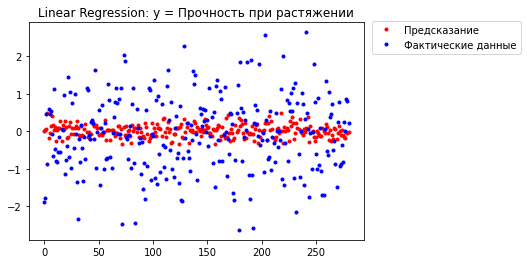

In [57]:
# ppr- target

plt.plot(pr_Y_pred, 'r.')
plt.plot(pr_Y_test.reset_index(drop=True),'b.')

plt.legend(['Предсказание', 'Фактические данные'],bbox_to_anchor=(1.01,1.03))
plt.title('Linear Regression: y = Прочность при растяжении')

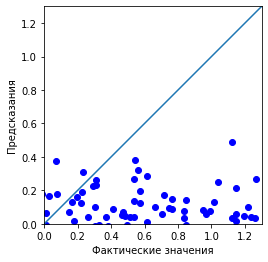

In [58]:
# Покажем, как предсказанные 
# значения совпадают с фактическими pr-target

tpr = plt.axes(aspect='equal')
plt.scatter(pr_Y_test, pr_Y_pred, c= 'b')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказания')
lims = [0, 1.3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

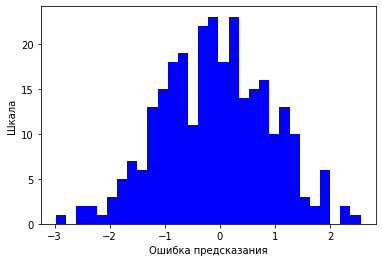

In [59]:
# Выведем график распределения ошибки pr-target
pr_error = pr_Y_test - pr_Y_pred
plt.hist(pr_error, bins=30, color = 'b')
plt.xlabel('Ошибка предсказания')
_ = plt.ylabel('Шкала')

In [60]:
lin = LinearRegression()
lin_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lin_pr = GridSearchCV(lin, lin_params, n_jobs=-1, cv=10)
GSCV_lin_pr.fit(pr_X_train, pr_Y_train)
GSCV_lin_pr.best_params_

{'fit_intercept': 'True'}

In [61]:
lin_pr = GSCV_lin_pr.best_estimator_
print(f'R2-score линейной регресии прочность при растяжении: {lin_pr.score(pr_X_test, pr_Y_test).round(3)}')

R2-score линейной регресии прочность при растяжении: -0.018


In [62]:
lin_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MAE': mean_absolute_error(pr_Y_test, lin_pr.predict(pr_X_test)), 
   'R2 score': lin_pr.score(pr_X_test, pr_Y_test).round(3)
}, index=['Прочность при растяжении'])

In [63]:
models2 = models1.append(lin_pr_result)
models2

,Model,MAE,R2 score
Модуль упругости при растяжении,LinearRegression_mu,0.838530,-0.019
Прочность при растяжении,LinearRegression_pr,0.797591,-0.018


#### Метод К-ближайших соседей (KNeighborsRegressor)

##### Для модуля упругости при растяжении

In [64]:
kn = KNeighborsRegressor()
kn_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_kn_mu = GridSearchCV(kn, kn_params, n_jobs=-1, cv=10)
GSCV_kn_mu.fit(mu_X_train, mu_Y_train)
GSCV_kn_mu.best_params_

{'algorithm': 'auto', 'n_neighbors': 71, 'weights': 'uniform'}

In [65]:
kn_mu = GSCV_kn_mu.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {kn_mu.score(mu_X_test, mu_Y_test).round(3)}')

R2-score KNR для модуля упругости при растяжении: -0.015


In [66]:
kn_mu_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_mu', 
   'MAE': mean_absolute_error(mu_Y_test, kn_mu.predict(mu_X_test)), 
   'R2 score': kn_mu.score(mu_X_test, mu_Y_test).round(3)
}, index=['Модуль упругости при растяжении'])

In [67]:
models3 = models2.append(kn_mu_result)
models3

,Model,MAE,R2 score
Модуль упругости при растяжении,LinearRegression_mu,0.838530,-0.019
Прочность при растяжении,LinearRegression_pr,0.797591,-0.018
Модуль упругости при растяжении,KNeighborsRegressor_mu,0.840831,-0.015


##### Для прочности при растяжении

In [68]:
GSCV_kn_pr = GridSearchCV(kn, kn_params, n_jobs=-1, cv=10)
GSCV_kn_pr.fit(pr_X_train, pr_Y_train)
GSCV_kn_pr.best_params_

{'algorithm': 'brute', 'n_neighbors': 235, 'weights': 'distance'}

In [69]:
kn_pr = GSCV_kn_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {kn_pr.score(pr_X_test, pr_Y_test).round(3)}')

R2-score KNR для прочности при растяжении: -0.009


In [70]:
kn_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(pr_Y_test, kn_pr.predict(pr_X_test)), 
   'R2 score': kn_pr.score(pr_X_test, pr_Y_test).round(3)
}, index=['Прочность при растяжении'])

models4 = models3.append(kn_pr_result)
models4

,Model,MAE,R2 score
Модуль упругости при растяжении,LinearRegression_mu,0.838530,-0.019
Прочность при растяжении,LinearRegression_pr,0.797591,-0.018
Модуль упругости при растяжении,KNeighborsRegressor_mu,0.840831,-0.015
Прочность при растяжении,KNeighborsRegressor_pr,0.792277,-0.009


#### Случайный лес (Random Forest Regressor) и оптимизация гиперпараметров

##### Для модуля упругости при растяжении

In [71]:
# Создаем сетку параметров на основе случайного поиска 
# Создаем модель поиска по сетке с перекрестной проверкой, количество блоков равно 10
rf = RandomForestRegressor()
rf_param = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
mu_rf = RandomizedSearchCV(rf, rf_param, n_jobs=-1, cv=10, verbose=4)
# Обучаем модель 
mu_rf.fit(mu_X_train, mu_Y_train)
# Ищем лучшие параметры для модели
mu_rf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\blago\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\blago\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\blago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 355, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\blago\anaconda3\lib\site-packa

{'n_estimators': 130,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_depth': 2,
 'criterion': 'squared_error',
 'bootstrap': 'False'}

In [72]:
#Предсказываем значения
mu_rf_pred = mu_rf.predict(mu_X_test).round(3)

mu_grid_rf = mu_rf.best_estimator_
print(f'R2-score RFRegr для модуля упругости при растяжении: {mu_grid_rf.score(mu_X_test, mu_Y_test).round(3)}')

R2-score RFRegr для модуля упругости при растяжении: -0.017


In [73]:
mu_rf_result = pd.DataFrame({
   'Model': 'Random Forest Regressor_mu', 
   'MAE': mean_absolute_error(mu_Y_test, mu_grid_rf.predict(mu_X_test)), 
   'R2 score': mu_grid_rf.score(mu_X_test, mu_Y_test).round(3)
}, index=['Модуль упругости при растяжении'])

models5 = models4.append(mu_rf_result)
models5

,Model,MAE,R2 score
Модуль упругости при растяжении,LinearRegression_mu,0.838530,-0.019
Прочность при растяжении,LinearRegression_pr,0.797591,-0.018
Модуль упругости при растяжении,KNeighborsRegressor_mu,0.840831,-0.015
Прочность при растяжении,KNeighborsRegressor_pr,0.792277,-0.009
Модуль упругости при растяжении,Random Forest Regressor_mu,0.839167,-0.017


##### Для прочности при растяжении

In [74]:
# Создаем сетку параметров на основе случайного поиска 
# Создаем модель поиска по сетке с перекрестной проверкой, количество блоков равно 10
rf = RandomForestRegressor()
rf_param = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
pr_rf = RandomizedSearchCV(rf, rf_param, n_jobs=-1, cv=10, verbose=4)
# Обучаем модель 
pr_rf.fit(pr_X_train, pr_Y_train)
# Ищем лучшие параметры для модели
pr_rf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\blago\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\blago\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\blago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 355, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\blago\anaconda3\lib\site-packa

{'n_estimators': 150,
 'min_samples_split': 30,
 'min_samples_leaf': 2,
 'max_depth': 2,
 'criterion': 'absolute_error',
 'bootstrap': 'True'}

In [75]:
# Предсказываем значения
pr_rf_pred = pr_rf.predict(pr_X_test).round(3)

pr_rf_grid = pr_rf.best_estimator_
print(f'R2-score RFRegr для прочности при растяжении: {pr_rf_grid.score(pr_X_test, pr_Y_test).round(3)}')

R2-score RFRegr для прочности при растяжении: -0.013


In [76]:
pr_rf_result = pd.DataFrame({
   'Model': 'Random Forest Regressor_pr', 
   'MAE': mean_absolute_error(pr_Y_test, pr_rf.predict(pr_X_test)), 
   'R2 score': pr_rf_grid.score(pr_X_test, pr_Y_test).round(3)
}, index=['Прочность при растяжении'])

models6 = models5.append(pr_rf_result)
models6

,Model,MAE,R2 score
Модуль упругости при растяжении,LinearRegression_mu,0.838530,-0.019
Прочность при растяжении,LinearRegression_pr,0.797591,-0.018
Модуль упругости при растяжении,KNeighborsRegressor_mu,0.840831,-0.015
Прочность при растяжении,KNeighborsRegressor_pr,0.792277,-0.009
Модуль упругости при растяжении,Random Forest Regressor_mu,0.839167,-0.017
Прочность при растяжении,Random Forest Regressor_pr,0.796620,-0.013


#### Построение нейронной сети, которая будет рекомендовать соотношение матрица-наполнитель

In [77]:
# Удалим столбец "Соотношение матрица-наполнитель", запишем датасет с удаленным столбцом в mf_X.
# Запишем переменную "Соотношение матрица-наполнитель" в mf_Y,

mf_X = df_standart.drop(['Соотношение матрица-наполнитель'], axis = 1)
mf_Y = df_standart['Соотношение матрица-наполнитель']

In [78]:
# mf делим на тестовую и тренировочную выборки, зависимая mf_Y - cоотношение матрица наполнитель.

mf_X_train, mf_X_test, mf_Y_train,  mf_Y_test = train_test_split(mf_X, mf_Y, test_size = 0.30, random_state=1)

In [79]:
normalizer = tf.keras.layers.Normalization(axis=-1)
mf_X_train_norm = normalizer.adapt(np.array(mf_X_train))

In [80]:
mf_model_1 = Sequential(mf_X_train_norm)

mf_model_1.add(Dense(128))
mf_model_1.add(BatchNormalization())
mf_model_1.add(LeakyReLU())
mf_model_1.add(Dense(128, activation='selu'))
mf_model_1.add(BatchNormalization())
mf_model_1.add(Dense(64, activation='selu'))
mf_model_1.add(BatchNormalization())
mf_model_1.add(Dense(32, activation='selu'))
mf_model_1.add(BatchNormalization())
mf_model_1.add(LeakyReLU())
mf_model_1.add(Dense(16, activation='selu'))
mf_model_1.add(BatchNormalization())
mf_model_1.add(Dense(1))
mf_model_1.add(Activation('selu'))

In [81]:
mf_early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [82]:
mf_model_1.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [83]:
%%time
history_mf_model_1 = mf_model_1.fit(
    mf_X_train,
    mf_Y_train,
    batch_size = 64,
    epochs=30,
    verbose=1,
    validation_split = 0.2,
    callbacks = [mf_early ]
    )

Epoch 1/30
9/9 [==============================] - 2s 35ms/step - loss: 1.0357 - val_loss: 0.8507
Epoch 2/30
9/9 [==============================] - 0s 7ms/step - loss: 0.8685 - val_loss: 0.8329
Epoch 3/30
9/9 [==============================] - 0s 8ms/step - loss: 0.7869 - val_loss: 0.8273
Epoch 4/30
9/9 [==============================] - 0s 6ms/step - loss: 0.7375 - val_loss: 0.8142
Epoch 5/30
9/9 [==============================] - 0s 6ms/step - loss: 0.7361 - val_loss: 0.8327
Epoch 6/30
9/9 [==============================] - 0s 6ms/step - loss: 0.7265 - val_loss: 0.8200
Epoch 7/30
9/9 [==============================] - 0s 6ms/step - loss: 0.7138 - val_loss: 0.8333
Epoch 8/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6978 - val_loss: 0.8315
Epoch 9/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6806 - val_loss: 0.8250
Epoch 10/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6521 - val_loss: 0.8605
Epoch 11/30
9/9 [=====================

In [84]:
mf_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [85]:
# Функция для построения графика потерь модели на тренировочной и тестовой выборках

def mod_loss_plot(model_history):
    plt.figure(figsize=(8, 4))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка (MAE)', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

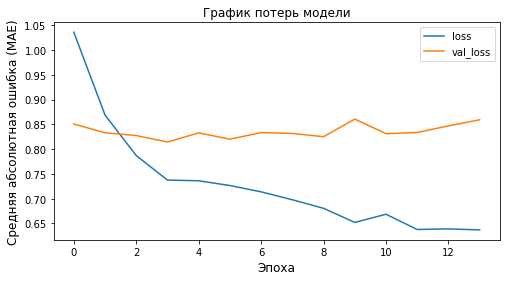

In [86]:
mod_loss_plot(history_mf_model_1)

In [87]:
#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predict_plot(original_y, predicted_y):    
    plt.figure(figsize=(9,5))
    plt.title('Тестовые и рекомендованные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Реальные данные')
    plt.plot(predicted_y, color='red', label = 'Рекомендованные значения')
    plt.legend(loc='best')
    plt.show()

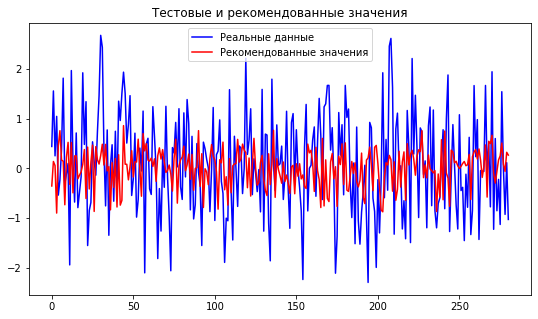

In [88]:
pred_mf = mf_model_1.predict(np.array((mf_X_test)))
original_mf = mf_Y_test.values
predicted_mf = pred_mf

actual_and_predict_plot(original_mf, predicted_mf)

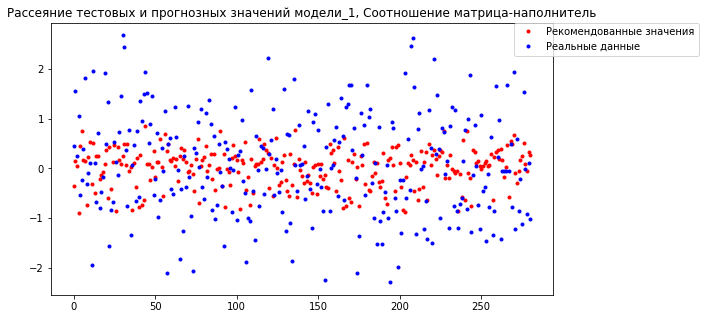

In [89]:
# Отрисуем фактические и прогнозные значения целевой переменной
plt.figure(figsize=(9,5))
plt.plot(predicted_mf, 'r.')
plt.plot(original_mf,'b.')

plt.legend(['Рекомендованные значения', 'Реальные данные'],bbox_to_anchor=(1.3,1.02))
plt.title('Рассеяние тестовых и прогнозных значений модели_1, Соотношение матрица-наполнитель');

In [90]:
mf_model_1.evaluate(mf_X_test, mf_Y_test, verbose=1)

9/9 [==============================] - 0s 3ms/step - loss: 0.8694


0.8694188594818115

In [91]:
np.mean(np.abs(mf_Y_test-np.mean(mf_Y_test)))

0.8303402063681543

In [92]:
mf_model_1.save('models/mf_model_1')

INFO:tensorflow:Assets written to: models/mf_model_1\assets


In [93]:
mf_model_1.save_weights('models/mf_model_1/weights')

#### Еще одна нейросеть, которая будет рекомендовать соотношение матрица-наполнитель

In [94]:
mf_model_2 = Sequential(

[Dense(12, activation = 'relu', input_dim=12),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1),
    
])

In [95]:
mf_early_2= EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [96]:
mf_model_2.compile(
    optimizer='adam',
    loss='mean_absolute_error')

In [97]:
%%time
history_mf_model_2 = mf_model_2.fit(
    mf_X_train,
    mf_Y_train,
    epochs=50,
    verbose=1,
    validation_split = 0.2,
    callbacks = [mf_early_2]
    )

Epoch 1/50
17/17 [==============================] - 1s 14ms/step - loss: 0.8047 - val_loss: 0.7815
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 0.7827 - val_loss: 0.7877
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7726 - val_loss: 0.7998
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7710 - val_loss: 0.7879
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7616 - val_loss: 0.7920
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7588 - val_loss: 0.7864
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7510 - val_loss: 0.7956
Epoch 8/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7467 - val_loss: 0.7957
Epoch 9/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7463 - val_loss: 0.7768
Epoch 10/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7451 - val_loss: 0.8100
Epoch 11/50
17/17 

In [98]:
mf_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 64)                832       
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,213
Trainable params: 5,213
Non-trainable params: 0
_________________________________________________________________


In [99]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def mod_loss_plot(history_mf_model_2 ):
    plt.figure(figsize=(8, 4))
    plt.plot(history_mf_model_2 .history['loss'])
    plt.plot(history_mf_model_2 .history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка (MAE)', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

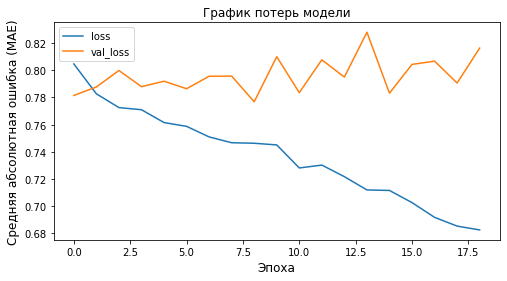

In [100]:
mod_loss_plot(history_mf_model_2)

In [101]:
#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predict_plot(original_y, predicted_y):    
    plt.figure(figsize=(9,5))
    plt.title('Тестовые и рекомендованные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Реальные данные')
    plt.plot(predicted_y, color='red', label = 'Рекомендованные значения')
    plt.legend(loc='best')
    plt.show()

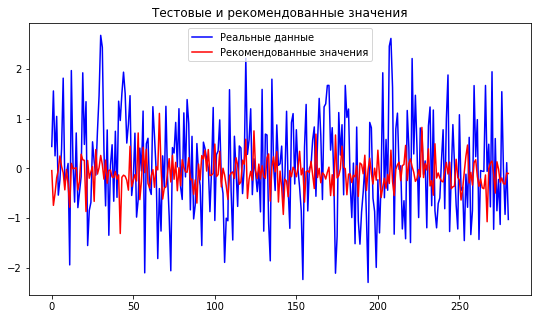

In [102]:
pred_mf_2 = mf_model_2.predict(np.array((mf_X_test)))
original_mf_2 = mf_Y_test.values
predicted_mf_2= pred_mf_2

actual_and_predict_plot(original_mf_2, predicted_mf_2)

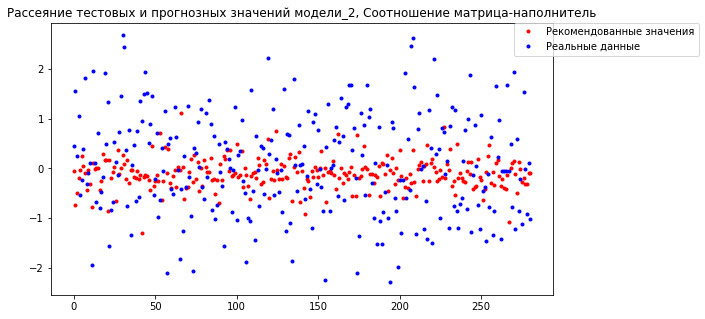

In [103]:
# Отрисуем фактические и прогнозные значения целевой переменной
plt.figure(figsize=(9,5))
plt.plot(predicted_mf_2, 'r.')
plt.plot(original_mf_2,'b.')

plt.legend(['Рекомендованные значения', 'Реальные данные'],bbox_to_anchor=(1.3,1.02))
plt.title('Рассеяние тестовых и прогнозных значений модели_2, Соотношение матрица-наполнитель');

In [104]:
mf_model_2.evaluate(mf_X_test, mf_Y_test, verbose=1)

9/9 [==============================] - 0s 2ms/step - loss: 0.8802


0.880216121673584

In [105]:
np.mean(np.abs(mf_Y_test-np.mean(mf_Y_test)))

0.8303402063681543

In [106]:
mf_model_2.save('models/mf_model_2')

INFO:tensorflow:Assets written to: models/mf_model_2\assets


In [107]:
mf_model_2.save_weights('models/mf_model_2/weights')

##### Построение нейронной сети с один выходом для предсказания модуля упругости при растяжении

In [108]:
model_3 = Sequential(

[Dense(11, activation = 'relu', input_dim=11),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1),
    
])

In [109]:
early_3= EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [110]:
model_3.compile(
    optimizer='adam',
    loss='mean_absolute_error')

In [111]:
%%time
history_model_3 = model_3.fit(
    mu_X_train,
    mu_Y_train,
    epochs=50,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_3]
    )

Epoch 1/50
17/17 [==============================] - 1s 10ms/step - loss: 0.8074 - val_loss: 0.8301
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7909 - val_loss: 0.8281
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 0.7808 - val_loss: 0.8391
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7737 - val_loss: 0.8316
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7677 - val_loss: 0.8384
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7613 - val_loss: 0.8376
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7535 - val_loss: 0.8402
Epoch 8/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7471 - val_loss: 0.8468
Epoch 9/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7417 - val_loss: 0.8573
Epoch 10/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7335 - val_loss: 0.8538
Epoch 11/50
17/17 

In [112]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 64)                768       
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,125
Trainable params: 5,125
Non-trainable params: 0
_________________________________________________________________


In [113]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def mod_loss_plot(history_model_3 ):
    plt.figure(figsize=(8, 4))
    plt.plot(history_mf_model_2 .history['loss'])
    plt.plot(history_mf_model_2 .history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка (MAE)', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

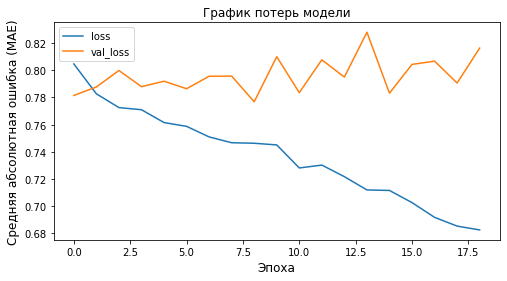

In [114]:
mod_loss_plot(history_model_3)

In [115]:
#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predict_plot(original_y, predicted_y):    
    plt.figure(figsize=(9,5))
    plt.title('Тестовые и рекомендованные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Реальные данные')
    plt.plot(predicted_y, color='red', label = 'Рекомендованные значения')
    plt.legend(loc='best')
    plt.show()

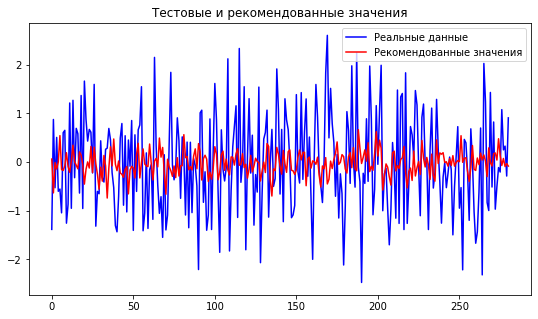

In [116]:
pred_3 = model_3.predict(np.array((mu_X_test)))
original_3 = mu_Y_test.values
predicted_3= pred_3

actual_and_predict_plot(original_3, predicted_3)

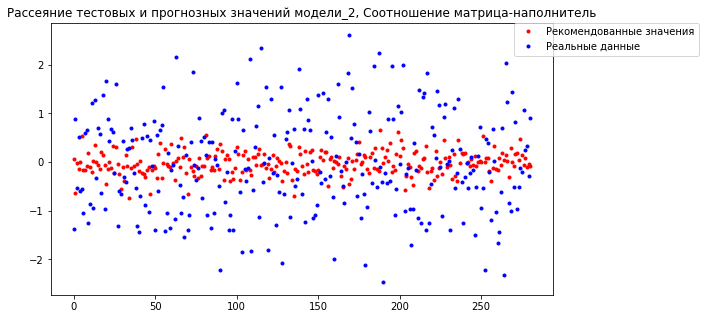

In [117]:
# Отрисуем фактические и прогнозные значения целевой переменной
plt.figure(figsize=(9,5))
plt.plot(predicted_3, 'r.')
plt.plot(original_3,'b.')

plt.legend(['Рекомендованные значения', 'Реальные данные'],bbox_to_anchor=(1.3,1.02))
plt.title('Рассеяние тестовых и прогнозных значений модели_2, Соотношение матрица-наполнитель');

In [118]:
model_3.evaluate(mu_X_test, mu_Y_test, verbose=1)

9/9 [==============================] - 0s 2ms/step - loss: 0.8493


0.8493221998214722

In [119]:
np.mean(np.abs(mu_Y_test-np.mean(mu_Y_test)))

0.8289382478364874

In [120]:
model_3.save('models/model_3')

INFO:tensorflow:Assets written to: models/model_3\assets


In [121]:
model_3.save_weights('models/model_3/weights')